In [1]:
import numpy as np
from sklearn.datasets import make_moons
import seaborn as sns
import matplotlib.pyplot as plt

from mlxtend.plotting import plot_decision_regions

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import Adam

In [3]:
X,y = make_moons(100,noise=0.25,random_state=2)

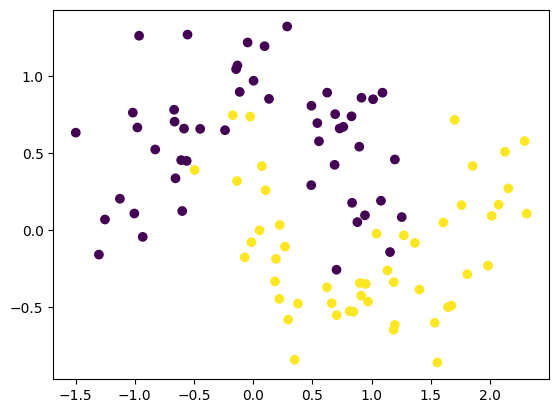

In [5]:
plt.scatter(X[:,0],X[:,1],c=y)

In [7]:
model=Sequential()
optimizer=Adam(learning_rate=0.01)

model.add(Dense(128,input_dim=2,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history=model.fit(X,y,epochs=600,validation_split=0.2,verbose=0)

In [9]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,077 (199.52 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 34,052 (133.02 KB)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


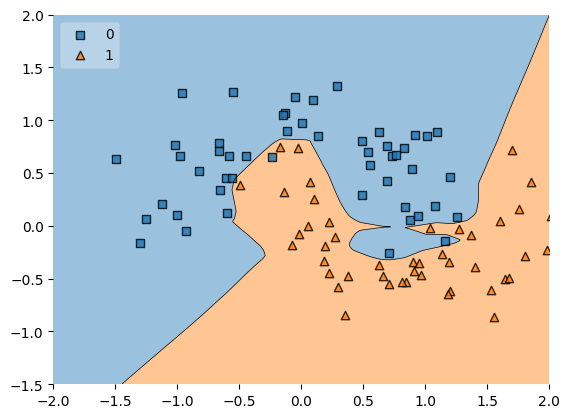

In [10]:
plot_decision_regions(X,y,clf=model,legend=2)
plt.xlim(-2,2)
plt.ylim(-1.5,2)
plt.show()

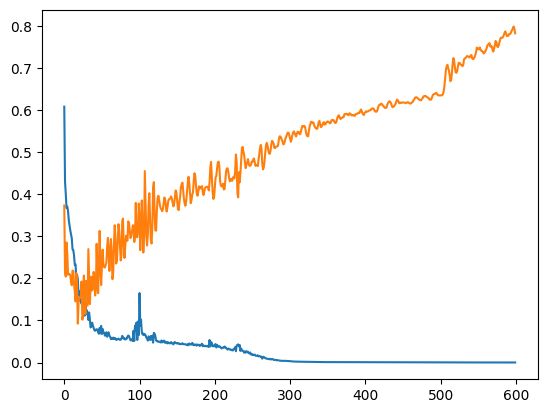

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

Regularization l1



In [16]:
model1=Sequential()
opt = Adam(learning_rate=0.01)

model1.add(Dense(128,input_dim=2,activation='relu',kernel_regularizer=keras.regularizers.l1(0.001)))
model1.add(Dense(128,activation='relu',kernel_regularizer=keras.regularizers.l1(0.001)))
model1.add(Dense(1,activation='sigmoid'))

model1.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
history1=model1.fit(X,y,epochs=600,validation_split=0.2,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


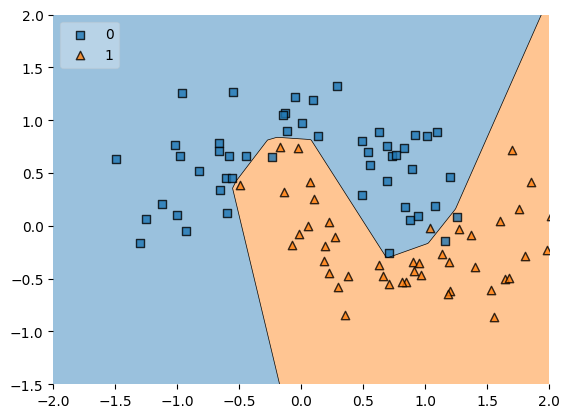

In [17]:
plt.figure()
plot_decision_regions(X,y,clf=model1,legend=2)
plt.xlim(-2,2)
plt.ylim(-1.5,2)
plt.show()

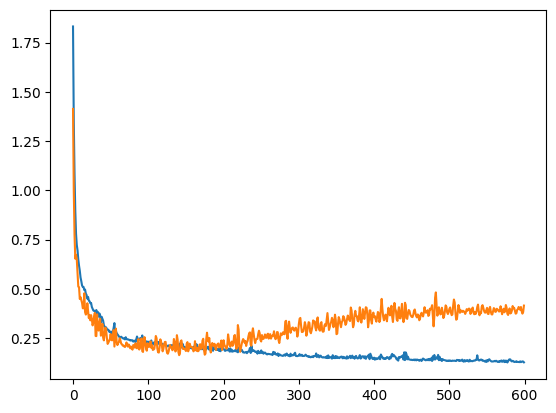

In [21]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

Regularization l2

In [18]:
model2=Sequential()
optimizer=Adam(learning_rate=0.01)

model2.add(Dense(128,input_dim=2,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.05)))
model2.add(Dense(128,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.03)))
model2.add(Dense(1,activation='sigmoid'))

model2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history2=model2.fit(X,y,epochs=600,validation_split=0.2,verbose=0)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


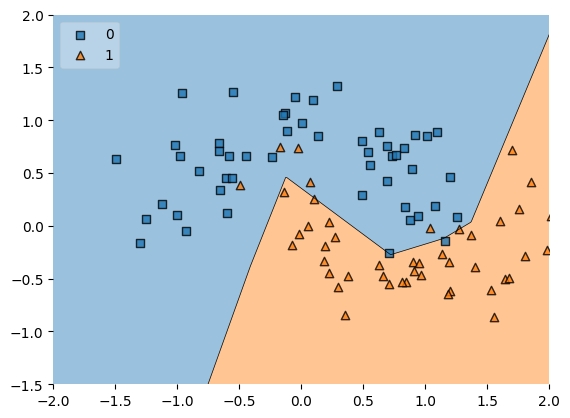

In [19]:
plt.figure()
plot_decision_regions(X,y,clf=model2,legend=2)
plt.xlim(-2,2)
plt.ylim(-1.5,2)
plt.show()

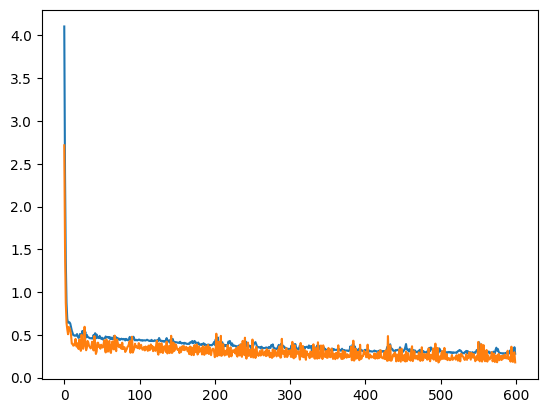

In [22]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])